In [3]:
#pip install open3d

In [4]:
#pip install -U matplotlib

In [5]:
#pip install --upgrade setuptools

In [6]:
#pip install imageio

In [7]:
#pip install -U pandas

In [8]:
#pip install pyequilib

In [9]:
#pip install seaborn

In [1]:
import imageio as iio
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from equilib import Equi2Pers

C:\Users\Fan_Z\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Fan_Z\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Fan_Z\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Part 1 point cloud

In [2]:
with open('../Project-demo/sample_data/test.npy', 'rb') as f:
    pcd = np.load(f)
print(pcd)

[[-2.14920429 -1.63684617  4.        ]
 [-1.6067541  -1.22763463  3.        ]
 [-3.20320998 -2.45526925  6.        ]
 ...
 [ 1.152787    2.20433945  8.        ]
 [ 0.58325899  1.10216972  4.        ]
 [ 0.59012447  1.10216972  4.        ]]


In [3]:
# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

Part 2 point cloud

In [4]:
def compute_colored_pointcloud_nested_loops(depth_image, rgb_image):
    """
    Compute the colored point cloud using nested loops.
    This function is written for demonstration purposes.
    It takes time.
    :param depth_image: a depth image
    :param rgb_image: the corresponding rgb image
    :return: the colored point cloud
    """

    height, width = depth_image.shape
    colors = []
    pcd = []
    for i in range(height):
        for j in range(width):
            """
                Convert the pixel from depth coordinate system
                to depth sensor 3D coordinate system
            """
            z = depth_image[i][j]
            x = (j - CX_DEPTH) * z / FX_DEPTH
            y = (i - CY_DEPTH) * z / FY_DEPTH

            """
                Convert the point from depth sensor 3D coordinate system
                to rgb camera coordinate system:            
            """
            [x_RGB, y_RGB, z_RGB] = np.linalg.inv(R).dot([x, y, z]) - np.linalg.inv(R).dot(T)

            """
                Convert from rgb camera coordinate system
                to rgb image coordinate system:            
            """
            j_rgb = int((x_RGB * FX_RGB) / z_RGB + CX_RGB + width / 2)
            i_rgb = int((y_RGB * FY_RGB) / z_RGB + CY_RGB)

            # Add point to point cloud:
            pcd.append([x, y, z])

            # Add the color of the pixel if it exists:
            if 0 <= j_rgb < width and 0 <= i_rgb < height:
                colors.append(rgb_image[i_rgb][j_rgb])
            else:
                colors.append([0., 0., 0.])
    return [np.array(pcd), np.array(colors)]

<ipython-input-5-b13152aad898>:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image = iio.imread('../Project-demo/sample_data/depth_predict_1.png')
<ipython-input-5-b13152aad898>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_image = iio.imread('../Project-demo/sample_data/test_img_1.jpg')


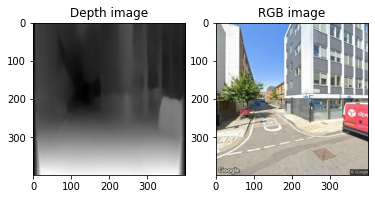

In [5]:
# here cx_depth should be about 200?? 
if __name__ == '__main__':
    # Depth Camera parameters:
    FX_DEPTH = 5.8262448167737955e+02
    FY_DEPTH = 5.8269103270988637e+02
    CX_DEPTH = 3.1304475870804731e+02
    CY_DEPTH = 2.3844389626620386e+02

    # RGB camera intrinsic Parameters:
    FX_RGB = 5.1885790117450188e+02
    FY_RGB = 5.1946961112127485e+02
    CX_RGB = 3.2558244941119034e+0
    CY_RGB = 2.5373616633400465e+02

    # Rotation matrix:
    R = -np.array([[9.9997798940829263e-01, 5.0518419386157446e-03, 4.3011152014118693e-03],
                   [-5.0359919480810989e-03, 9.9998051861143999e-01, -3.6879781309514218e-03],
                   [- 4.3196624923060242e-03, 3.6662365748484798e-03, 9.9998394948385538e-01]])
    # Translation vector:
    T = np.array([2.5031875059141302e-02, -2.9342312935846411e-04, 6.6238747008330102e-04])

    # Read depth and color image:
    depth_image = iio.imread('../Project-demo/sample_data/depth_predict_1.png')
    rgb_image = iio.imread('../Project-demo/sample_data/test_img_1.jpg')
    #rgb_image = iio.imread('../Project-demo/sample_data/test_img.jpg')
    
    # Display depth and grayscale image:
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(depth_image, cmap="gray")
    axs[0].set_title('Depth image')
    axs[1].imshow(rgb_image)
    axs[1].set_title('RGB image')
    plt.show()

    # compute point cloud:
    # Both images has the same resolution
    height, width = depth_image.shape

    # compute indices:
    jj = np.tile(range(width), height)
    ii = np.repeat(range(height), width)

    # Compute constants:
    xx = (jj - CX_DEPTH) / FX_DEPTH
    yy = (ii - CY_DEPTH) / FY_DEPTH

    # transform depth image to vector of z:
    length = height * width
    z = depth_image.reshape(length)

    # compute point cloud
    pcd = np.dstack((xx * z, yy * z, z)).reshape((length, 3))
    
    cam_RGB = np.apply_along_axis(np.linalg.inv(R).dot, 1, pcd) - np.linalg.inv(R).dot(T)
    xx_rgb = ((cam_RGB[:, 0] * FX_RGB) / cam_RGB[:, 2] + CX_RGB + width / 2).astype(int).clip(0, width - 1)
    yy_rgb = ((cam_RGB[:, 1] * FY_RGB) / cam_RGB[:, 2] + CY_RGB).astype(int).clip(0, height - 1)
    colors = rgb_image[yy_rgb, xx_rgb]



In [6]:
colors

Array([[169, 173, 172],
       [169, 173, 172],
       [169, 173, 172],
       ...,
       [193, 193, 185],
       [167, 167, 159],
       [193, 193, 185]], dtype=uint8)

In [7]:
with open('../Project-demo/sample_data/test_2_pcd.npy', 'wb') as f:
    np.save(f, pcd)

with open('../Project-demo/sample_data/test_2_colors.npy', 'wb') as f:
    np.save(f, colors)

Part 1 point cloud with color

In [8]:
with open('../Project-demo/sample_data/test_2_pcd.npy', 'rb') as f:
    pcd = np.load(f)
print(pcd)

[[-2.14920429 -1.63684617  4.        ]
 [-1.6067541  -1.22763463  3.        ]
 [-3.20320998 -2.45526925  6.        ]
 ...
 [ 1.152787    2.20433945  8.        ]
 [ 0.58325899  1.10216972  4.        ]
 [ 0.59012447  1.10216972  4.        ]]


In [9]:
with open('../Project-demo/sample_data/test_2_colors.npy', 'rb') as f:
    colors = np.load(f)
print(colors)

[[169 173 172]
 [169 173 172]
 [169 173 172]
 ...
 [193 193 185]
 [167 167 159]
 [193 193 185]]


In [10]:
# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create a point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)
pcd_o3d.colors = o3d.utility.Vector3dVector(np.array(colors / 255))
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

part 2 using default open 3d

In [11]:
# for 400*400 picture

In [12]:
depth_raw = o3d.io.read_image('../Project-demo/sample_data/depth_predict_1.png')
color_raw = o3d.io.read_image('../Project-demo/sample_data/test_img_1.jpg')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 400x400, with 1 channels.
Depth image : 400x400, with 1 channels.
Use numpy.asarray to access buffer data.


In [13]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

In [14]:
point_cloud_file_name = '../Project-demo/sample_data/point_cloud_test.ply'
o3d.io.write_point_cloud(point_cloud_file_name, pcd, write_ascii=False, compressed=False, print_progress=False)

True

In [15]:
# for 375*1242 picture

In [16]:
depth_raw = o3d.io.read_image('../Project-demo/sample_data/depth_predict.png')
color_raw = o3d.io.read_image('../Project-demo/sample_data/test_img.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 1242x375, with 1 channels.
Depth image : 1242x375, with 1 channels.
Use numpy.asarray to access buffer data.


In [17]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

In [18]:
intrinsics = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
print(intrinsics)

PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.


part 4

In [57]:
import requests

app_access_token = 'MLY|8443722902364390|832fa01211e391f5fd88c8a6186d2ff8' # create your access token at https://mapillary.com/developer
image_id = '169979785061521'
url = 'https://graph.mapillary.com/{}/?fields=id,camera_parameters,atomic_scale,thumb_original_url&access_token={}'.format(image_id,app_access_token)
# or instead of adding it to the url, add the token in headers (strongly recommended for user tokens)
headers = { "Authorization" : "OAuth {}".format(app_access_token) }
response = requests.get(url, headers)
data = response.json()

print(data)

{'id': '169979785061521', 'camera_parameters': [0.58551074610826, 0.0044488907520614, -0.032349286690073], 'atomic_scale': 1.2171837490563, 'thumb_original_url': 'https://scontent-xsp1-1.xx.fbcdn.net/m1/v/t6/An-lrUC2b2RsLVg4POu8hjHAUCiLVNI9aV08B7WKFuP3HaFvZB6yVxY3hIDsVyIPK5AxN2-T0I65K2ND_ILHn4eVnmrW4oXhQcm3UCOaPEWRnlI5HiUkHsOSWkVqMHC8bb-MaRhsENxYMnxlO2ozLA?ccb=10-5&oh=00_AfD63PJAU2WMa5XQc7s8JGDLUX-xljzBBvt-swGIzvqGYA&oe=640930CF&_nc_sid=122ab1'}


In [58]:
depth_raw = o3d.io.read_image('../Project-demo/sample_data/depth_predict_2.png')
color_raw = o3d.io.read_image('../Project-demo/sample_data/test_img_2.jpg')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 3840x2160, with 1 channels.
Depth image : 3840x2160, with 1 channels.
Use numpy.asarray to access buffer data.


In [60]:
depth_raw

Image of size 3840x2160, with 1 channels.
Use numpy.asarray to access buffer data.

In [36]:
2160/2

1080.0

In [37]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

In [38]:
o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault).intrinsic_matrix

array([[525. ,   0. , 319.5],
       [  0. , 525. , 239.5],
       [  0. ,   0. ,   1. ]])

In [39]:
phc = o3d.camera.PinholeCameraIntrinsic()
phc.set_intrinsics(3840, 2160, 0.58551074610826*3840, 0.58551074610826*2140, 1920, 1080)
phc.intrinsic_matrix


array([[2.24836127e+03, 0.00000000e+00, 1.92000000e+03],
       [0.00000000e+00, 1.25299300e+03, 1.08000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [40]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, phc)
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

In [43]:
point_cloud_file_name = '../Project-demo/sample_data/Mapillary_169979785061521_pcd.ply'
o3d.io.write_point_cloud(point_cloud_file_name, pcd, write_ascii=False, compressed=False, print_progress=False)



True

In [52]:
import PIL.Image as pil
path = '../Project-demo/sample_data/depth_predict_1.png'

depth_raw  = pil.open(path).convert('RGB')

width,height = depth_raw.size
f = 0.7
fx = f * width
fy = f * height
cx = width/2
cy = height/2

In [53]:
## autonomize the process
depth_raw = o3d.io.read_image('../Project-demo/sample_data/depth_predict_1.png')
color_raw = o3d.io.read_image('../Project-demo/sample_data/test_img_1.jpg')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 400x400, with 1 channels.
Depth image : 400x400, with 1 channels.
Use numpy.asarray to access buffer data.


In [54]:
phc = o3d.camera.PinholeCameraIntrinsic()

phc.set_intrinsics(width, height, fx, fy, cx, cy)
phc.intrinsic_matrix

array([[280.,   0., 200.],
       [  0., 280., 200.],
       [  0.,   0.,   1.]])

In [55]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

#### Directly convert the panaorama to 3D point cloud with perspective methods

In [61]:
import PIL.Image as pil
path = '../Project-demo/sample_data/depth_predict_3.png'

depth_raw  = pil.open(path).convert('RGB')

width,height = depth_raw.size
f = 0.7
fx = f * width
fy = f * height
cx = width/2
cy = height/2

In [49]:
## autonomize the process
depth_raw = o3d.io.read_image('../Project-demo/sample_data/depth_predict_3.png')
color_raw = o3d.io.read_image('../Project-demo/sample_data/test_img_3.jpg')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 2048x1024, with 1 channels.
Depth image : 2048x1024, with 1 channels.
Use numpy.asarray to access buffer data.


In [50]:
phc = o3d.camera.PinholeCameraIntrinsic()

phc.set_intrinsics(width, height, fx, fy, cx, cy)
phc.intrinsic_matrix

array([[1.4336e+03, 0.0000e+00, 1.0240e+03],
       [0.0000e+00, 7.1680e+02, 5.1200e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [51]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd])

In [47]:
print(np.asarray(pcd.points))

[[-1.19327734e-05  8.94491149e-06 -1.96078436e-05]
 [-9.51634030e-06  7.15592936e-06 -1.56862752e-05]
 [-7.11484599e-06  5.36694681e-06 -1.17647060e-05]
 ...
 [ 1.16000005e-03 -5.26722712e-04 -3.52941192e-04]
 [ 1.16067232e-03 -5.26722712e-04 -3.52941192e-04]
 [ 1.16134459e-03 -5.26722712e-04 -3.52941192e-04]]


#### Convert the panaorama to 3D point cloud with spherical coordinate system

#### C++ 

List<double> pnt;                   // 3D point list x0,y0,z0,x1,y1,z1,...
void compute()
    {
    int x,y,xs,ys;      // texture positiona and size
    double a,b,r,da,db; // spherical positiona and angle steps
    double xx,yy,zz;    // 3D point
    DWORD *p;           // texture pixel access
    // load and prepare BMP texture
    Graphics::TBitmap *bmp=new Graphics::TBitmap;
    
    
    bmp->LoadFromFile("map.bmp");
    bmp->HandleType=bmDIB;
    bmp->PixelFormat=pf32bit;
    xs=bmp->Width;
    ys=bmp->Height;
/*
    // 360x180 deg
    da=2.0*M_PI/double(xs-1);
    db=1.0*M_PI/double(ys-1);
    b=-0.5*M_PI;
*/
    // 180x90 deg
    da=1.0*M_PI/double(xs-1);
    db=0.5*M_PI/double(ys-1);
    b=-0.25*M_PI;

    // proces all its pixels
    pnt.num=0;
    for (                                 y=0; y<ys; y++,b+=db)
     for (p=(DWORD*)bmp->ScanLine[y],a=0.0,x=0; x<xs; x++,a+=da)
        {
        // pixel access
        r=DWORD(p[x]&255);  // obtain intensity from texture <0..255>
        r/=255.0;           // normalize to <0..1>
        // convert to 3D
        xx=r*cos(a)*cos(b);
        yy=r*sin(a)*cos(b);
        zz=r*       sin(b);
        // store to pointcloud
        pnt.add(xx);
        pnt.add(yy);
        pnt.add(zz);
        }
    // clean up
    delete bmp;
    }

In [5]:
pnt = []  # 3D point list x0, y0, z0, x1, y1, z1, ...
from PIL import Image

def compute():
    x, y, xs, ys = 0, 0, 0, 0  # texture position and size
    a, b, r, da, db = 0.0, 0.0, 0.0, 0.0, 0.0  # spherical position and angle steps
    xx, yy, zz = 0.0, 0.0, 0.0  # 3D point

    # Load and prepare BMP texture
    bmp = Image.open('../Project-demo/sample_data/depth_predict_3.png')

    xs, ys = bmp.size

    # 180x90 deg
    da = 1.0 * 3.14 / (xs - 1)
    db = 0.5 * 3.14 / (ys - 1)
    b = -0.25 * 3.14

    # Process all its pixels
    pnt.clear()
    for y in range(ys):
        b += db
        for x in range(xs):
            a += da

            # Pixel access
            r = bmp.getpixel((x, y))[0]  # obtain intensity from texture <0..255>
            r /= 255.0  # normalize to <0..1>

            # Convert to 3D
            xx = r * cos(a) * cos(b)
            yy = r * sin(a) * cos(b)
            zz = r * sin(b)

            # store to pointcloud
            pnt.append(xx)
            pnt.append(yy)
            pnt.append(zz)

    # Clean up
    bmp.close()

In [120]:
pnt = []  # 3D point list x0, y0, z0, x1, y1, z1, ...
clr = []
remove_x = []
remove_y = []
from PIL import Image

x, y, xs, ys = 0, 0, 0, 0  # texture position and size
a, b, r, da, db = 0.0, 0.0, 0.0, 0.0, 0.0  # spherical position and angle steps
xx, yy, zz = 0.0, 0.0, 0.0  # 3D point
    
depth_img = Image.open('../Project-demo/sample_data/depth_predict_3.png')
color_img = Image.open('../Project-demo/sample_data/test_img_3.jpg')

xs, ys = depth_img.size

# 180x90 deg
da = 2.0 * 3.14 / (xs - 1)
db = 1 * 3.14 / (ys - 1)
b = -0.5 * 3.14
depth_img_array = np.asarray(depth_img)
depth_max = depth_img_array.max()

# Process all its pixels
pnt.clear()
for y in range(ys):
    b += db
    for x in range(xs):
        a += da

        # Pixel access
        r1 = depth_max - depth_img.getpixel((x, y))  # obtain intensity from texture <0..255>
        
        # remove the points within the central area

            
        r2 = r1/float(depth_max)  # normalize to <0..1>

        # Convert to 3D
        xx = r2 * np.cos(a) * np.cos(b)
        yy = r2 * np.sin(a) * np.cos(b)
        zz = r2 * np.sin(b)
            
            
        c = color_img.getpixel((x, y))
        c0 = c[0]/255.0
        c1 = c[1]/255.0
        c2 = c[2]/255.0
        
        #pnt.append([xx,yy,zz])
    
    
        #clr.append([c0,c1,c2])
        
        if r1>30 and zz <0.15:
            # store to pointcloud
            pnt.append([xx,yy,zz])
    
    
            clr.append([c0,c1,c2])
        
        
        

            
        

# 找出深度超标的深度没达标的点，删去
# 可以也再尝试一些其他的全景图

KeyboardInterrupt: 

In [181]:
pnt = []  # 3D point list x0, y0, z0, x1, y1, z1, ...
clr = []
remove_x = []
remove_y = []
from PIL import Image

x, y, xs, ys = 0, 0, 0, 0  # texture position and size
a, b, r, da, db = 0.0, 0.0, 0.0, 0.0, 0.0  # spherical position and angle steps
xx, yy, zz = 0.0, 0.0, 0.0  # 3D point
    
depth_img = Image.open('../Project-demo/sample_data/depth_predict_3.png')
color_img = Image.open('../Project-demo/sample_data/test_img_3.jpg')

xs, ys = depth_img.size

# 180x90 deg
da = 2.0 * 3.14 / (xs - 1)
db = 1 * 3.14 / (ys - 1)
b = -0.5 * 3.14
depth_img_array = np.asarray(depth_img)
depth_max = depth_img_array.max()


b_spilt_0 = 0
b_spilt = 1/(ys - 1)

# Process all its pixels
pnt.clear()
for y in range(ys):
    #from negative 90 to positive 90 vertically 
    b += db
    b_spilt_0 += b_spilt
    
    for x in range(xs):
        # from 0 to 360 horizontally 
        a += da

        # Pixel access
        r1 = depth_max - depth_img.getpixel((x, y))  # obtain intensity from texture <0..255>
        
        # remove the points within the central area

            
        r2 = r1/float(depth_max)  # normalize to <0..1>

        # Convert to 3D
        xx = 2*r2 * np.cos(a) * np.cos(b)
        yy = 2*r2 * np.sin(a) * np.cos(b)
        zz = (2*r2)**2 *np.sin(b)
         
    
             
            
        c = color_img.getpixel((x, y))
        c0 = c[0]/255.0
        c1 = c[1]/255.0
        c2 = c[2]/255.0
        
        

        #pnt.append([xx,yy,zz])
        #clr.append([c0,c1,c2])
        
        if r1>20 and zz <0.2:
            pnt.append([xx,yy,zz])
            clr.append([c0,c1,c2])
        
        
     

            
        

# 找出深度超标的深度没达标的点，删去
# 可以也再尝试一些其他的全景图

In [182]:
pnt

[[0.0073066028850174965, 2.241602837176957e-05, -3.5724887031173957],
 [0.007391459029102236, 4.535314629535824e-05, -3.6560528655889093],
 [0.007476242405964242, 6.881113052618925e-05, -3.7405830877421735],
 [0.007560950618359924, 9.278974801085059e-05, -3.8260793695771893],
 [0.007475679463802785, 0.00011468233909186144, -3.7405830877421735],
 [0.007475292449262835, 0.00013761643221768302, -3.7405830877421735],
 [0.007389893769358997, 0.00015872480702439323, -3.6560528655889093],
 [0.0073893720406651734, 0.0001813955110019827, -3.6560528655889093],
 [0.007303852248469542, 0.00020171893862595282, -3.5724887031173957],
 [0.007303199023016208, 0.00022412547353898744, -3.5724887031173957],
 [0.007217564535691789, 0.0002436632722442564, -3.4898906003276347],
 [0.007131879705484967, 0.0002626777714147787, -3.4082585572196256],
 [0.007131040273768094, 0.0002845564249867563, -3.4082585572196256],
 [0.007045251180153412, 0.00030278439553983944, -3.3275925737933667],
 [0.006959418159853103, 0.

In [183]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pnt)
pcd.colors = o3d.utility.Vector3dVector(np.array(clr))

o3d.visualization.draw_geometries([pcd])

In [47]:
point_cloud_file_name = '../Project-demo/sample_data/singapore_panorama_1.ply'
o3d.io.write_point_cloud(point_cloud_file_name, pcd, write_ascii=False, compressed=False, print_progress=False)


True

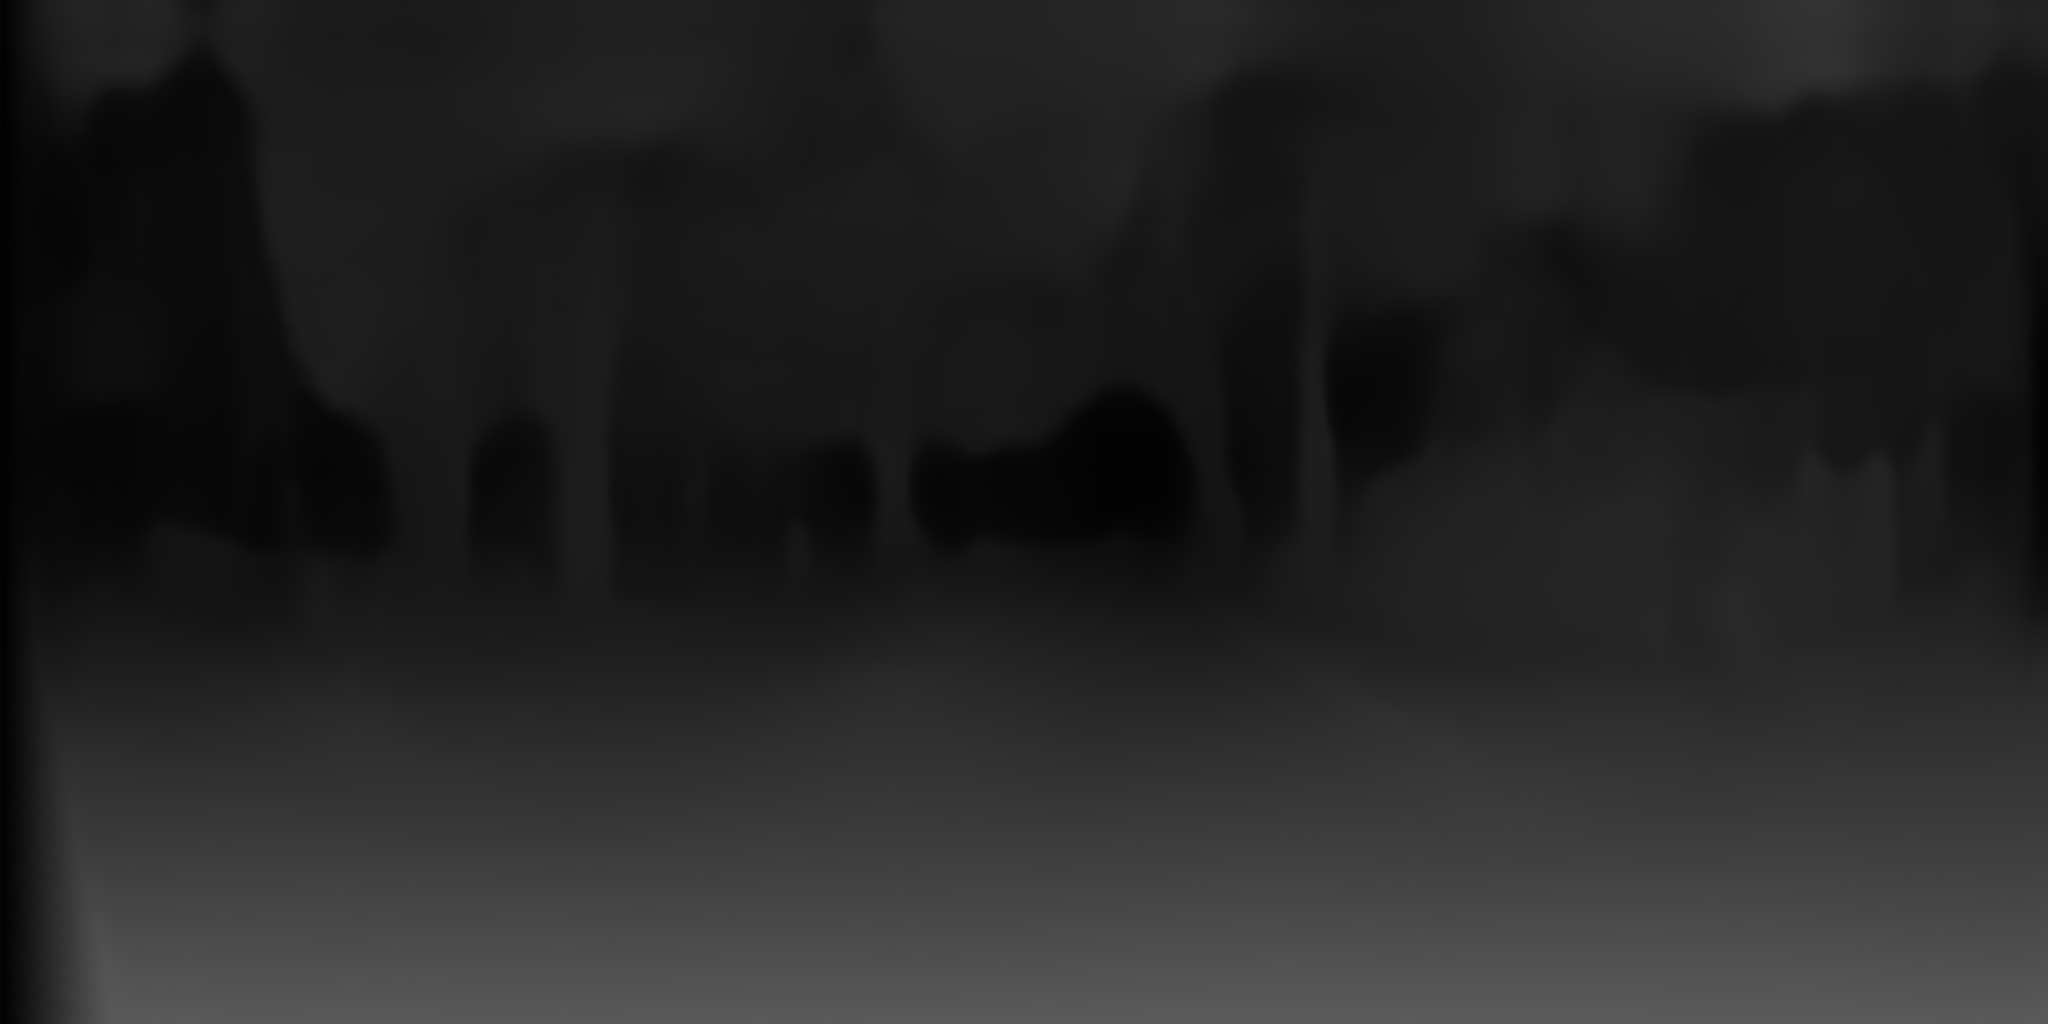

In [24]:
depth_img

In [ ]:
depth_img = Image.open('../Project-demo/sample_data/depth_predict_3.png')
color_img = Image.open('../Project-demo/sample_data/test_img_3.jpg')

In [22]:
for y in range(ys):
    for x in range(xs):

        # Pixel access
        print( depth_max - depth_img.getpixel((x, y)))  # obtain intensity from texture <0..255>


86
87
88
89
88
88
87
87
86
86
85
84
84
83
82
82
81
80
80
79
78
78
77
76
76
75
74
74
73
73
72
71
71
70
69
69
68
68
67
67
66
66
65
65
64
64
63
63
62
62
62
61
61
61
61
60
60
60
60
60
59
59
59
59
59
58
58
58
58
57
57
57
57
57
56
56
56
56
56
56
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
57
57
58
58
58
57
57
57
57
57
57
57
57
57
57
57
56
56
56
56
56
56
56
56
55
55
55
55
55
55
55
55
55
55
55
55
55
55
54
54
55
55
55
55
55
55
55
55
55
56
56
56
56
57
57
57
58
58
58
59
59
60
60
61
61
62
62
63
64
64
64
65
65
66
66
66
67
67
67
67
68
68
68
68
69
69
69
69
69
69
69
69
69
69
69
69
68
68
68
68
67
67
67
67
66
66
65
65
65
64
64
63
63
63
62
62
62
61
61
61
61
61
60
60
60
60
60
60
60
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
60
60
60
60
60
60
60
60
60
61
61
61
61
61
61
61
61
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
63
63
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65
65
65
65
65
65
65
65
65
65
65
65
65
65
6

KeyboardInterrupt: 

In [43]:
depth_img_array = np.asarray(depth_img)
#depth_img_array.max()
depth_img_array
remove_x = []
remove_y = []

for y in range(ys):

    for x in range(xs):
        if

array([[ 5,  4,  3, ..., 34, 34, 34],
       [ 5,  4,  3, ..., 34, 34, 34],
       [ 5,  4,  3, ..., 35, 34, 34],
       ...,
       [ 5,  4,  3, ..., 90, 90, 90],
       [ 5,  4,  3, ..., 90, 90, 90],
       [ 5,  4,  3, ..., 90, 90, 90]], dtype=uint8)

In [51]:
depth_img_array.max()-depth_img_array.flatten()

array([86, 87, 88, ...,  1,  1,  1], dtype=uint8)

<ipython-input-52-c0c71454fb41>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=depth_img_array.max()-depth_img_array.flatten(), hist=True, kde=False, rug=False )


<AxesSubplot: >

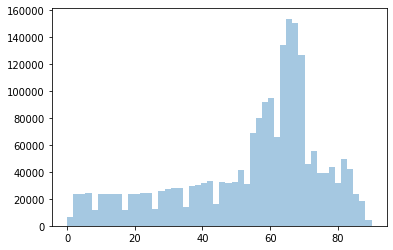

In [52]:
# library & dataset
import seaborn as sns


# Plot the histogram thanks to the distplot function
sns.distplot( a=depth_img_array.max()-depth_img_array.flatten(), hist=True, kde=False, rug=False )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import numpy as np
import cv2
from math import sin, cos, pi


# Load the image
pano_img = cv2.imread('../Project-demo/sample_data/depth_predict_3.png')
color_img = cv2.imread('../Project-demo/sample_data/test_img_3.jpg')

    
# Convert to grayscale
gray = cv2.cvtColor(pano_img, cv2.COLOR_BGR2GRAY)
    
# Get image dimensions
h, w = gray.shape
    
# Normalize intensity values to a range of 0 to 1
#gray = gray / 255.0
    
# Initialize list to store 3D points
points = []
    
# Map the 2D image to a 3D spherical coordinate system
for y in range(h):
    for x in range(w):
        theta = pi * (x / w - 0.5)
        phi = pi * (y / h - 0.5)
 
        r = depth_img.getpixel((x, y))  # obtain intensity from texture <0..255>
            
        x = r * cos(theta) * cos(phi)
        y = r * sin(theta) * cos(phi)
        z = r * sin(phi)
            
        points.append([x, y, z])
    


points

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_geometries([pcd])

In [ ]:
o3d.visualization.draw_geometries([pcd])

In [96]:
import cv2
import numpy as np

# Load the panorama image and its depth map
panorama_image = cv2.imread('../Project-demo/sample_data/test_img_3.jpg')
depth_map = cv2.imread('../Project-demo/sample_data/depth_predict_3.png', cv2.IMREAD_ANYDEPTH)

# Define the intrinsic parameters of the camera
focal_length = ... # Fill in the focal length of the camera
principal_point = (..., ...) # Fill in the principal point of the camera

# Convert the depth values to 3D points in the camera coordinate system
rows, cols = depth_map.shape
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
Z = depth_map / 1000.0

# Define the intrinsic parameters of the camera
focal_length = 0.5 # Fill in the focal length of the camera
principal_point = (X/2, Y/2) # Fill in the principal point of the camera

points_3d = np.column_stack((X.flatten(), Y.flatten(), Z.flatten()))
points_3d = np.column_stack(((points_3d - principal_point) * Z / focal_length, Z))

# Transform the 3D points into the world coordinate system
R = ... # Fill in the rotation matrix
t = ... # Fill in the translation vector
points_3d = (R @ points_3d.T + t).T

# Store the resulting 3D points in a point cloud data structure
point_cloud = np.column_stack((points_3d, panorama_image[Y, X]))

ValueError: operands could not be broadcast together with shapes (2097152,3) (2,1024,2048) 

In [16]:
import numpy as np
from PIL import Image
from equilib import equi2pers

# Input equirectangular image
equi_img = Image.open("../Project-demo/sample_data/test_img_3.jpg")
equi_img = np.asarray(equi_img)
equi_img = np.transpose(equi_img, (2, 0, 1))

# rotations
rots = {
    'roll': 0.,
    'pitch': 0,  # rotate vertical
    'yaw': 0,  # rotate horizontal
}

# Run equi2pers
pers_img = equi2pers(
    equi=equi_img,
    rots=rots,
    height=480,
    width=640,
    fov_x=90.0,
    mode="bilinear",
)

In [17]:
equi_img

array([[[241, 241, 241, ..., 237, 237, 237],
        [241, 241, 241, ..., 237, 237, 237],
        [241, 241, 241, ..., 238, 238, 238],
        ...,
        [136, 136, 136, ..., 132, 132, 131],
        [126, 126, 126, ..., 123, 123, 122],
        [120, 120, 120, ..., 117, 117, 117]],

       [[253, 253, 253, ..., 251, 251, 251],
        [253, 253, 253, ..., 251, 251, 251],
        [253, 253, 253, ..., 252, 252, 252],
        ...,
        [138, 138, 138, ..., 137, 137, 136],
        [128, 128, 128, ..., 128, 128, 127],
        [122, 122, 122, ..., 122, 122, 122]],

       [[253, 253, 253, ..., 251, 251, 251],
        [253, 253, 253, ..., 251, 251, 251],
        [253, 253, 253, ..., 252, 252, 252],
        ...,
        [135, 135, 135, ..., 131, 131, 130],
        [127, 127, 127, ..., 122, 122, 121],
        [121, 121, 121, ..., 116, 116, 116]]], dtype=uint8)

In [21]:
from PIL import Image
import numpy as np
img = Image.fromarray(equi_img, 'RGB')

img.show()


In [20]:
equi_img = Image.open("../Project-demo/sample_data/test_img_3.jpg")
equi_img = np.asarray(equi_img)
equi_img

array([[[241, 253, 253],
        [241, 253, 253],
        [241, 253, 253],
        ...,
        [237, 251, 251],
        [237, 251, 251],
        [237, 251, 251]],

       [[241, 253, 253],
        [241, 253, 253],
        [241, 253, 253],
        ...,
        [237, 251, 251],
        [237, 251, 251],
        [237, 251, 251]],

       [[241, 253, 253],
        [241, 253, 253],
        [241, 253, 253],
        ...,
        [238, 252, 252],
        [238, 252, 252],
        [238, 252, 252]],

       ...,

       [[136, 138, 135],
        [136, 138, 135],
        [136, 138, 135],
        ...,
        [132, 137, 131],
        [132, 137, 131],
        [131, 136, 130]],

       [[126, 128, 127],
        [126, 128, 127],
        [126, 128, 127],
        ...,
        [123, 128, 122],
        [123, 128, 122],
        [122, 127, 121]],

       [[120, 122, 121],
        [120, 122, 121],
        [120, 122, 121],
        ...,
        [117, 122, 116],
        [117, 122, 116],
        [117, 122, 116]]

In [7]:
import os
import sys
import cv2
import numpy as np

def xyz2lonlat(xyz):
    atan2 = np.arctan2
    asin = np.arcsin

    norm = np.linalg.norm(xyz, axis=-1, keepdims=True)
    xyz_norm = xyz / norm
    x = xyz_norm[..., 0:1]
    y = xyz_norm[..., 1:2]
    z = xyz_norm[..., 2:]

    lon = atan2(x, z)
    lat = asin(y)
    lst = [lon, lat]

    out = np.concatenate(lst, axis=-1)
    return out

def lonlat2XY(lonlat, shape):
    X = (lonlat[..., 0:1] / (2 * np.pi) + 0.5) * (shape[1] - 1)
    Y = (lonlat[..., 1:] / (np.pi) + 0.5) * (shape[0] - 1)
    lst = [X, Y]
    out = np.concatenate(lst, axis=-1)

    return out 

class Equirectangular:
    def __init__(self, img_name):
        self._img = cv2.imread(img_name, cv2.IMREAD_COLOR)
        [self._height, self._width, _] = self._img.shape
        #cp = self._img.copy()  
        #w = self._width
        #self._img[:, :w/8, :] = cp[:, 7*w/8:, :]
        #self._img[:, w/8:, :] = cp[:, :7*w/8, :]
    

    def GetPerspective(self, FOV, THETA, PHI, height, width):
        #
        # THETA is left/right angle, PHI is up/down angle, both in degree
        #

        f = 0.5 * width * 1 / np.tan(0.5 * FOV / 180.0 * np.pi)
        cx = (width - 1) / 2.0
        cy = (height - 1) / 2.0
        K = np.array([
                [f, 0, cx],
                [0, f, cy],
                [0, 0,  1],
            ], np.float32)
        K_inv = np.linalg.inv(K)
        
        x = np.arange(width)
        y = np.arange(height)
        x, y = np.meshgrid(x, y)
        z = np.ones_like(x)
        xyz = np.concatenate([x[..., None], y[..., None], z[..., None]], axis=-1)
        xyz = xyz @ K_inv.T

        y_axis = np.array([0.0, 1.0, 0.0], np.float32)
        x_axis = np.array([1.0, 0.0, 0.0], np.float32)
        R1, _ = cv2.Rodrigues(y_axis * np.radians(THETA))
        R2, _ = cv2.Rodrigues(np.dot(R1, x_axis) * np.radians(PHI))
        R = R2 @ R1
        xyz = xyz @ R.T
        lonlat = xyz2lonlat(xyz) 
        XY = lonlat2XY(lonlat, shape=self._img.shape).astype(np.float32)
        persp = cv2.remap(self._img, XY[..., 0], XY[..., 1], cv2.INTER_CUBIC, borderMode=cv2.BORDER_WRAP)

        return persp

In [41]:
import os
import cv2 
from PIL import Image
import numpy as np
#import Equirec2Perspec as E2P 

equ_rgb = Equirectangular("../Project-demo/sample_data/test_img_3.jpg")    # Load equirectangular image
    
    #
    # FOV unit is degree 
    # theta is z-axis angle(right direction is positive, left direction is negative)
    # phi is y-axis angle(up direction positive, down direction negative)
    # height and width is output image dimension 
    #
img_0 = equ.GetPerspective(90, 0, 0, 720, 720) # Specify parameters(FOV, theta, phi, height, width)
img_0 = Image.fromarray(img_0, 'RGB')

img_90 = equ.GetPerspective(90, 90, 0, 720, 720) # Specify parameters(FOV, theta, phi, height, width)
img_90 = Image.fromarray(img_90, 'RGB')

img_180 = equ.GetPerspective(90, 180, 0, 720, 720) # Specify parameters(FOV, theta, phi, height, width)
img_180 = Image.fromarray(img_180, 'RGB')

img_270 = equ.GetPerspective(90, 270, 0, 720, 720) # Specify parameters(FOV, theta, phi, height, width)
img_270 = Image.fromarray(img_270, 'RGB')



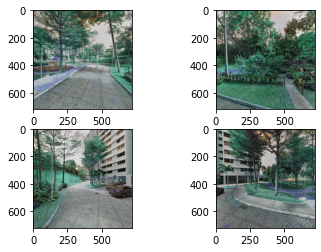

In [42]:
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(img_0)
axs[0,1].imshow(img_90)
axs[1,0].imshow(img_180)
axs[1,1].imshow(img_270)

plt.show()